# Classification des chiffres manuscrites

## Rappel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from sklearn.cluster import KMeans

In [3]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

print(trainData.shape)
print(testData.shape)
print(type(trainData))

(42000, 785)
(28000, 784)
<class 'pandas.core.frame.DataFrame'>


(42000, 785)
(28000, 784)
(28000, 784)


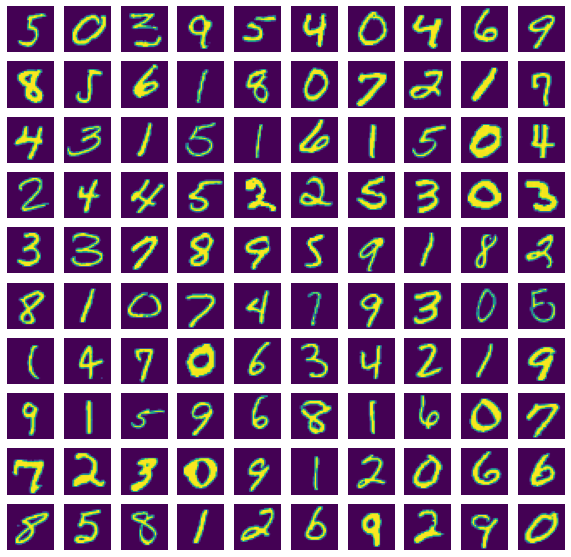

In [4]:
X_test=testData.iloc[:,:].values
print(trainData.shape)
print(testData.shape)
print(X_test.shape)
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X_test[np.random.randint(X_test.shape[0])].reshape(28,28))          
       axarr[i,j].axis('off')  

## k-Means

### 2.2.2 Préparation des données

In [6]:
vecTrain = trainData.iloc[:, 1:].to_numpy()
print(vecTrain.shape)
print(type(vecTrain))

(42000, 784)
<class 'numpy.ndarray'>


### 2.2.4 k-Means Training

In [8]:
kmeans = KMeans(n_clusters = 10, init = 'random')
kmeans.fit(vecTrain)

KMeans(init='random', n_clusters=10)

In [9]:
Z = kmeans.predict(vecTrain)

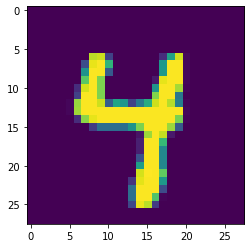

In [10]:
xNum = vecTrain[1999].reshape(1, -1)
plt.imshow(xNum.reshape(28,28))

In [11]:
print(Z[1999])

1


### 2.2.5

cluster 0
100 elements


C:\Users\MINGLE~1.JIA\AppData\Local\Temp/ipykernel_19856/1455569558.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(r+1, 10, k+1)


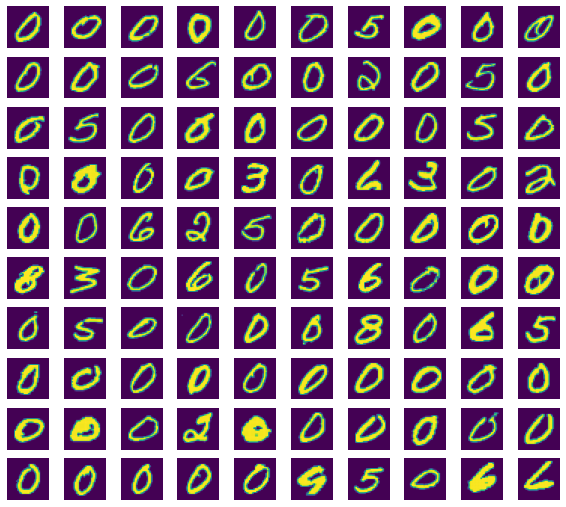

cluster 1
100 elements


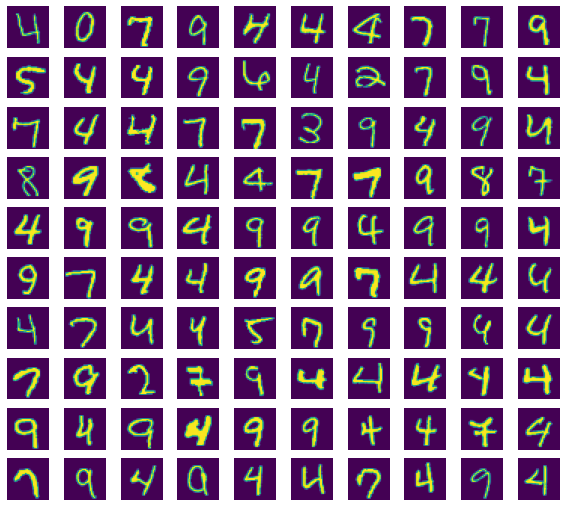

cluster 2
100 elements


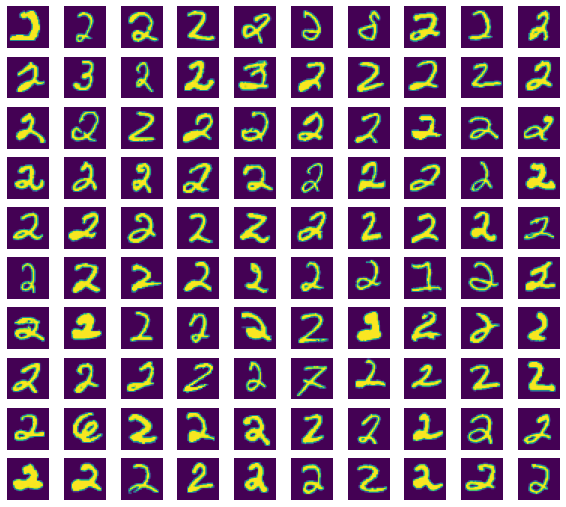

cluster 3
100 elements


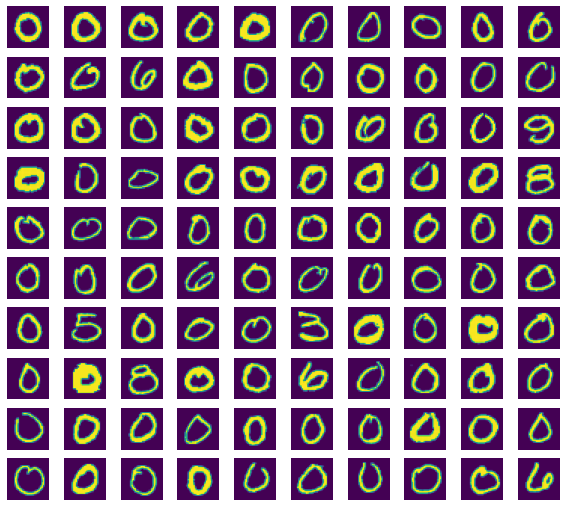

cluster 4
100 elements


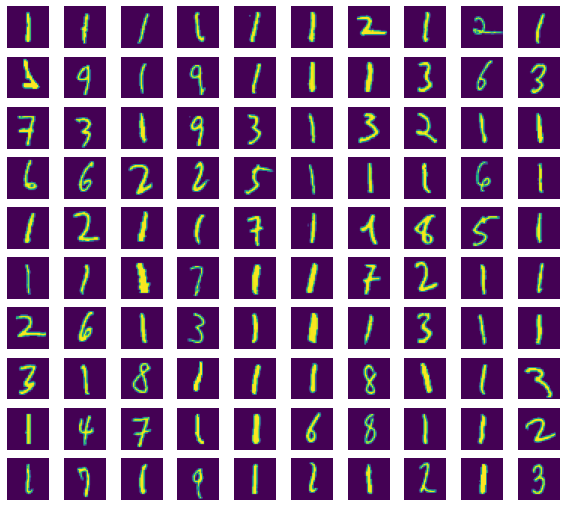

cluster 5
100 elements


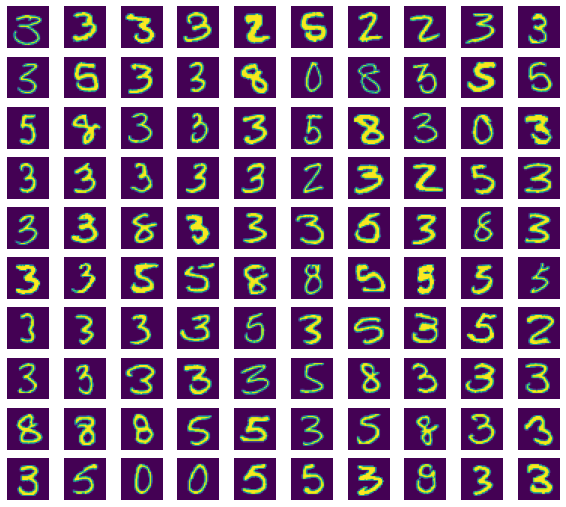

cluster 6
100 elements


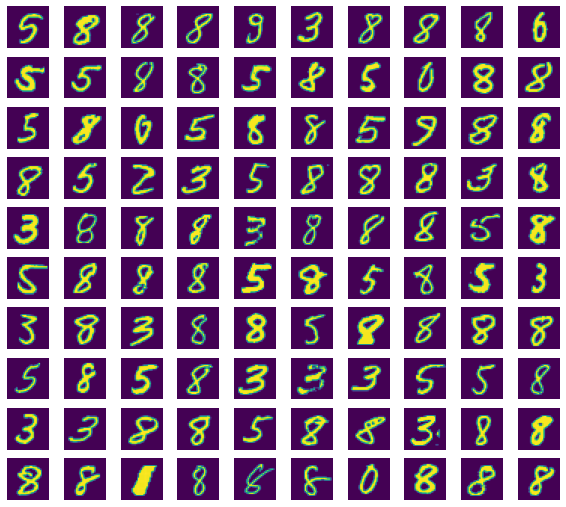

cluster 7
100 elements


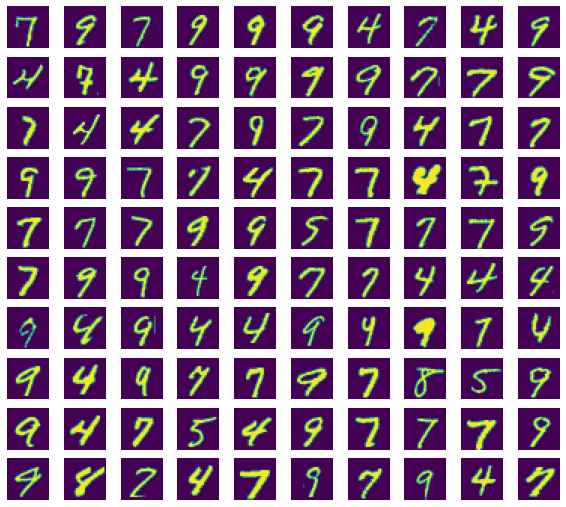

cluster 8
100 elements


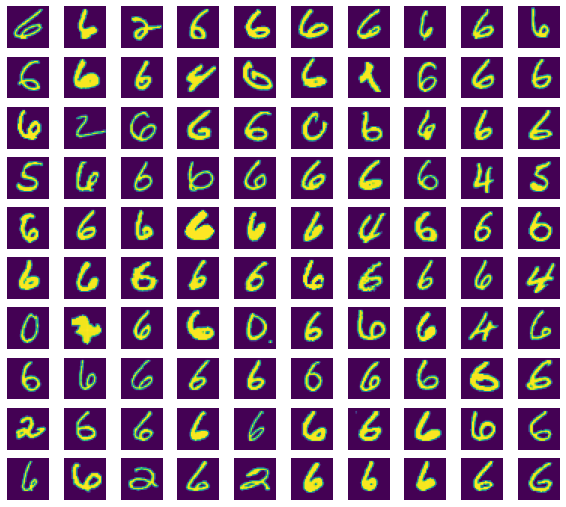

cluster 9
100 elements


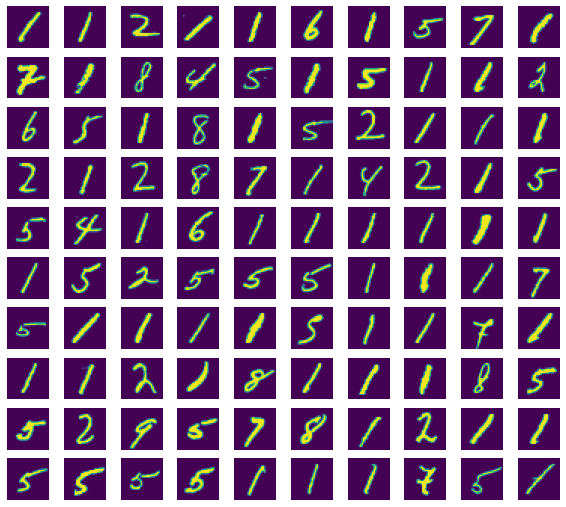

In [12]:
for i in range(0,10):

    row = np.where(Z==i)[0]  # row in Z for elements of cluster i
    num = 100
    r = np.floor(num/10.)    # number of rows in the figure of the cluster 

    print("cluster "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = vecTrain[row[k], ]
        image = image.reshape(28, 28)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

### 2.2.6

In [13]:
vecTrain_Label = trainData.iloc[:, :1].to_numpy()

In [15]:
for i in range(0,10):
    row = np.where(Z==i)[0] #row in Z for elements of cluster i
    num = row.shape[0]
    r = np.floor(num/10.)
    
    print("cluster " + str(i))
    print(str(num) + "elements")
    
    lst = [0] * 10
    
    for k in range (0, num):
        label_Num = vecTrain_Label[row[k]][0]
        lst[label_Num] += 1
    print(lst)
    print(np.sum(lst))
    print(np.argmax(lst))

cluster 0
2199elements
[1714, 0, 71, 90, 7, 170, 95, 9, 26, 17]
2199
0
cluster 1
6398elements
[24, 4, 126, 121, 2279, 239, 55, 1308, 127, 2115]
6398
4
cluster 2
3229elements
[9, 3, 2909, 150, 28, 12, 49, 31, 32, 6]
3229
2
cluster 3
2211elements
[1981, 0, 9, 11, 10, 49, 84, 9, 26, 32]
2211
0
cluster 4
4115elements
[1, 2635, 240, 290, 97, 115, 196, 216, 178, 147]
4115
1
cluster 5
5270elements
[138, 4, 236, 2785, 0, 1264, 19, 4, 769, 51]
5270
3
cluster 6
4652elements
[117, 8, 113, 761, 13, 1064, 62, 7, 2456, 51]
4652
8
cluster 7
6039elements
[8, 4, 48, 34, 1293, 250, 2, 2605, 126, 1669]
6039
7
cluster 8
3982elements
[129, 5, 139, 43, 129, 73, 3411, 5, 36, 12]
3982
6
cluster 9
3905elements
[11, 2021, 286, 66, 216, 559, 164, 207, 287, 88]
3905
1


### 2.2.7

In [16]:
sumAcc = 0

for i in range(0, 10):
    row = np.where (Z==i)[0]
    num = row.shape[0]
    
    lst = [0] * 10
    
    for k in range (0, num):
        label_Num = vecTrain_Label[row[k]][0]
        lst[label_Num] += 1
    sumAcc += np.max(lst)/np.sum(lst)
    
accuracy_clus = sumAcc/10

In [17]:
print(accuracy_clus)

0.6434780379105318


## 2.3 PCA sur nos données

In [18]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
def get_normed_mean_cov(X):
    x_std = StandardScaler().fit_transform(X)
    x_mean = np.mean(x_std, axis = 0)
    
    x_cov = np.cov(x_std.T)
#     x_cov = (x_std - x_mean).T.dot((x_std - x_mean)/(x_std.shape[0]-1))
    
    return x_std, x_mean, x_cov

In [23]:
X_std, X_mean, X_cov = get_normed_mean_cov(vecTrain)

In [24]:
X_cov.shape

(784, 784)

### 2.3.2

In [25]:
eigenvals, eigenvecs = np.linalg.eig(X_cov)

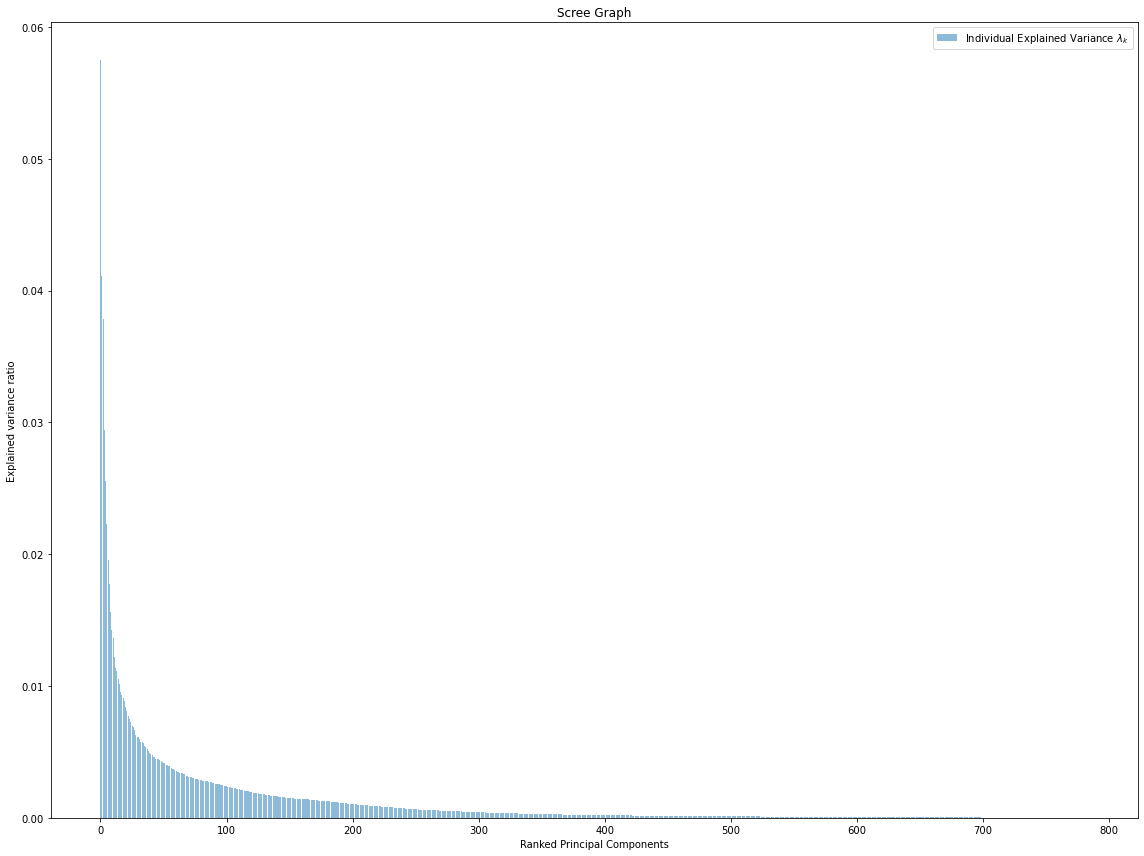

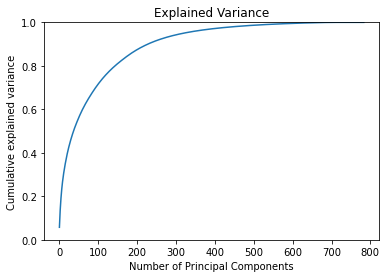

In [26]:
lam_sum = sum(eigenvals)
explained_variance = [(lam_k/lam_sum) for lam_k in sorted(eigenvals, reverse=True)]

#########
#Graphe1#
#########

plt.figure(figsize=(16, 12))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='Individual Explained Variance $\lambda_{k}$')

plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph")

plt.legend(loc='best')
plt.tight_layout()

#########
#Graphe2#
#########

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.plot(np.cumsum(explained_variance))

ax1.set_ylim([0,1.0])

ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative explained variance')
ax1.set_title('Explained Variance')

plt.show()

In [31]:
cumSumList = np.cumsum(explained_variance)

In [33]:
cumSumList[100]

0.7168784113457342

In [34]:
cumSumList[200]

0.8747744165943907

## Réduction de dimensionnalité à 100 dimensions

In [27]:
sklearn_pca = PCA(n_components=100).fit(X_std - X_mean)

In [29]:
X_pca = sklearn_pca.transform(X_std - X_mean)

In [30]:
print((X_std - X_mean).shape)
print(X_pca.shape)

(42000, 784)
(42000, 100)


### 2.5 Modèle Régression logistique

In [35]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
logisticRegr = LogisticRegression(max_iter=10000)
x_train, x_test, y_train, y_test = train_test_split(X_pca, vecTrain_Label, test_size = 0.25, random_state=0)

t0 = time.time()
logisticRegr.fit(x_train, y_train)
t1 = time.time()

predicted_numbers = logisticRegr.predict(x_test)
t2 = time.time()

time_train = t1-t0
time_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
accuracy_loRe = logisticRegr.score(x_test, y_test)
print(accuracy_loRe)

C:\Users\minglei.jiang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 18.234246s; Prediction time: 0.004001s
0.9201904761904762


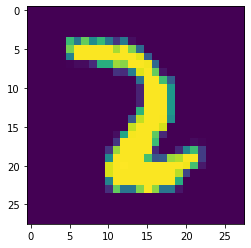

In [43]:
xNum03 = X_test[2999].reshape(1,-1)
plt.imshow(xNum03.reshape(28,28)) 

In [44]:
print(logisticRegr.predict(sklearn_pca.transform(xNum03)))

[2]


In [45]:
42000*100/(42000*784) 

0.12755102040816327

### Modèle SVM

In [46]:
import time
from sklearn.model_selection import train_test_split
from sklearn import svm

In [48]:
classifier_linear = svm.SVC(kernel='linear', C = 0.5)

x_train, x_test, y_train, y_test = train_test_split(X_pca, vecTrain_Label, test_size = 0.25, random_state=0)

t0 = time.time()
classifier_linear.fit(x_train, y_train)
t1 = time.time()

predicted_numbers = classifier_linear.predict(x_test)
t2 = time.time()

time_train = t1-t0
time_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
accuracy_svm = classifier_linear.score(x_test, y_test)
print(accuracy_svm)

C:\Users\minglei.jiang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 35.783767s; Prediction time: 3.420123s
0.9353333333333333


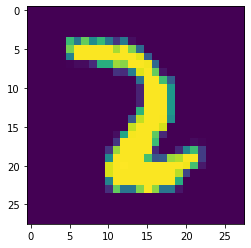

In [49]:
xNum03 = X_test[2999].reshape(1,-1)
plt.imshow(xNum03.reshape(28,28)) 

In [50]:
print(classifier_linear.predict(sklearn_pca.transform(xNum03)))

[2]


## La réduction de la dimensionnalité à 200 components

In [51]:
sklearn_pca_200 = PCA(n_components=200).fit(X_std - X_mean)

In [52]:
X_pca_200 = sklearn_pca_200.transform(X_std - X_mean)
print((X_std - X_mean).shape)
print(X_pca_200.shape)

(42000, 784)
(42000, 200)


In [53]:
logisticRegr = LogisticRegression(max_iter=10000)
x_train, x_test, y_train, y_test = train_test_split(X_pca_200, vecTrain_Label, test_size = 0.25, random_state=0)

t0 = time.time()
logisticRegr.fit(x_train, y_train)
t1 = time.time()

predicted_numbers = logisticRegr.predict(x_test)
t2 = time.time()

time_train = t1-t0
time_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
accuracy_loRe_200 = logisticRegr.score(x_test, y_test)
print(accuracy_loRe_200)

C:\Users\minglei.jiang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 30.359755s; Prediction time: 0.011366s
0.9216190476190477


In [54]:
classifier_linear = svm.SVC(kernel='linear', C = 0.5)

x_train, x_test, y_train, y_test = train_test_split(X_pca_200, vecTrain_Label, test_size = 0.25, random_state=0)

t0 = time.time()
classifier_linear.fit(x_train, y_train)
t1 = time.time()

predicted_numbers = classifier_linear.predict(x_test)
t2 = time.time()

time_train = t1-t0
time_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
accuracy_svm_200 = classifier_linear.score(x_test, y_test)
print(accuracy_svm_200)

C:\Users\minglei.jiang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 53.405935s; Prediction time: 6.406882s
0.9342857142857143


# Conclusion

accuracy_clus
0.6434780379105318

(PCA à 100 Dims 71%)
accuracy_loRe_100
Training time: 18.234246s; Prediction time: 0.004001s
0.9201904761904762

accuracy_svm_100 
Training time: 35.783767s; Prediction time: 3.420123s
0.9353333333333333

(PCA à 200 Dims 87%)
accuracy_loRe_200
Training time: 30.359755s; Prediction time: 0.011366s
0.9216190476190477

accuracy_svm_200
Training time: 53.405935s; Prediction time: 6.406882s
0.9342857142857143